# Lab 10 - Fine-Tune VGG16 for Bird Classification
# Name: Nihal Patel
# Student ID: 8945100

In this lab, we will work through a common practice of Deep Learning Engineers - that is - take an existing model, that does something similar to what the engineer is interested doing, and fine-tune it for the specific task at-hand.

This lab is the last one, so it is a bit more elaborated than the others. So make sure to take time to work through it.

A good starting point is to use the code in the notebook we went over in class - for fine-tuning VGG16.

The goal of this lab is to achieve the best classification performance over three classes (species) of birds. This should be done by exploring data augmentation and fine-tuning of a pre-trained model (VGG16). Finally, explore and describe the results.

If you are interested, you are encouraged to explore various training configurations, and see which one works better.

1. Obtain the Data:<br>
i. Download the BIRDS 525 SPECIES dataset from Kaggle (CC0 license). You will need to create a free Kaggle account, and this will provide you free access to many such datasets, as well as code and even online notebooks. <br>
ii. Unpack the data. Notice that the data is organized into folders in a way similar to the Dogs vs Cats dataset that we worked with. This makes it easy to load with the same Keras function (ImageDataGenerator.flow_from_directory). <br>
iii. For this lab, we will work with the 3 classes with the highest number of images. Identify those classes, and use only these for the next steps. You can delete/discard the others. <br>

2. Use data-augmentation to increase the number of training images. You are encouraged to try out various augmentation methods supported by Keras. The rule of thumb is that as long as an augmentation produces realistic images - it is probably a good idea to add it.(2 point)

3. Fine-Tune VGG16 (pre-trained on imagenet), to classify the 3 classes (2 points)

4. Explore the model performance: accuracy, confusion metric, precision, recall, F1-score, precision-recall curve and its area under the curve (AUC). Explore specific examples in which the model failed to predict correctly. (2 points)

# Part 1
1. Obtain the Data:<br>
i. Download the BIRDS 525 SPECIES dataset from Kaggle (CC0 license). You will need to create a free Kaggle account, and this will provide you free access to many such datasets, as well as code and even online notebooks. <br>
ii. Unpack the data. Notice that the data is organized into folders in a way similar to the Dogs vs Cats dataset that we worked with. This makes it easy to load with the same Keras function (ImageDataGenerator.flow_from_directory). <br>
iii. For this lab, we will work with the 3 classes with the highest number of images. Identify those classes, and use only these for the next steps. You can delete/discard the others. <br>

In [13]:
# We will import all the necessary libraries
import os
import shutil

In [14]:
# We will define the path to the train folder
trainDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/train'

In [117]:
# We will display the list of subfolders (classes) in the train folder
classes = os.listdir(trainDataDirectory)
classes

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [16]:
# We will create a dictionary to store the number of images for each class
classImageCount = {}

In [17]:
# We will iterate over each class and count the number of images
for className in classes:
    classPath = os.path.join(trainDataDirectory, className)
    imageCount = len(os.listdir(classPath))
    classImageCount[className] = imageCount

In [12]:
# We will perform sorting of classes on the basis of the number of images which are in descending order
sortedClasses = sorted(classImageCount.items(), key=lambda x: x[1], reverse=True)
sortedClasses

[('RUFOUS TREPE', 263),
 ('HOUSE FINCH', 248),
 ('D-ARNAUDS BARBET', 233),
 ('OVENBIRD', 233),
 ('ASIAN GREEN BEE EATER', 220),
 ('SWINHOES PHEASANT', 216),
 ('WOOD DUCK', 214),
 ('CASPIAN TERN', 213),
 ('RED BILLED TROPICBIRD', 212),
 ('WOOD THRUSH', 211),
 ('FRILL BACK PIGEON', 209),
 ('MERLIN', 209),
 ('PYRRHULOXIA', 209),
 ('MILITARY MACAW', 208),
 ('ORNATE HAWK EAGLE', 208),
 ('OYSTER CATCHER', 207),
 ('LAUGHING GULL', 206),
 ('EASTERN YELLOW ROBIN', 205),
 ('JACOBIN PIGEON', 204),
 ('DARK EYED JUNCO', 203),
 ('GREATER PRAIRIE CHICKEN', 203),
 ('RED TAILED HAWK', 202),
 ('YELLOW BREASTED CHAT', 202),
 ('VIOLET BACKED STARLING', 201),
 ('VIOLET GREEN SWALLOW', 201),
 ('LIMPKIN', 200),
 ('PLUSH CRESTED JAY', 200),
 ('RED KNOT', 200),
 ('SORA', 200),
 ('GREY HEADED CHACHALACA', 199),
 ('BLUE THROATED PIPING GUAN', 198),
 ('CRIMSON SUNBIRD', 198),
 ('CAMPO FLICKER', 197),
 ('CRESTED WOOD PARTRIDGE', 197),
 ('KNOB BILLED DUCK', 197),
 ('MARABOU STORK', 197),
 ('RED BEARDED BEE EATER', 

In [21]:
# We will select and print the top three classes
topThreeClasses = [className for className, _ in sortedClasses[:3]]
print("The Top Three Classes are as below:\n", topThreeClasses)

The Top Three Classes are as below:
 ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [42]:
# Create a new directory to store data for the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'
os.makedirs(newDataDirectory, exist_ok=True)


In [43]:
# We will iterate through all the top classes and copy all the relevant data
for className in topThreeClasses:
    sourceClassDirectory = os.path.join(trainDataDirectory, className)
    destinationClassDirectory = os.path.join(newDataDirectory, className)
    shutil.copytree(sourceClassDirectory, destinationClassDirectory)

In [44]:
destinationClassDirectory

'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders\\D-ARNAUDS BARBET'

Based on the above operations, we have got the Top 3 classes ['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET'] in the destination class directory and we will perform further operations on this data.

# Part 2
2. Use data-augmentation to increase the number of training images. You are encouraged to try out various augmentation methods supported by Keras. The rule of thumb is that as long as an augmentation produces realistic images - it is probably a good idea to add it.(2 point)

We will perform the 1st set of Augmentation

In [51]:
# We will import the required libraries
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# Set up data augmentation parameters
imageDataGen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# We will perform data augmentation and get a batch of augmented images
batchSize = 30
trainGenerator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical'
)

augmentedImages, _ = trainGenerator.next()

Found 744 images belonging to 3 classes.


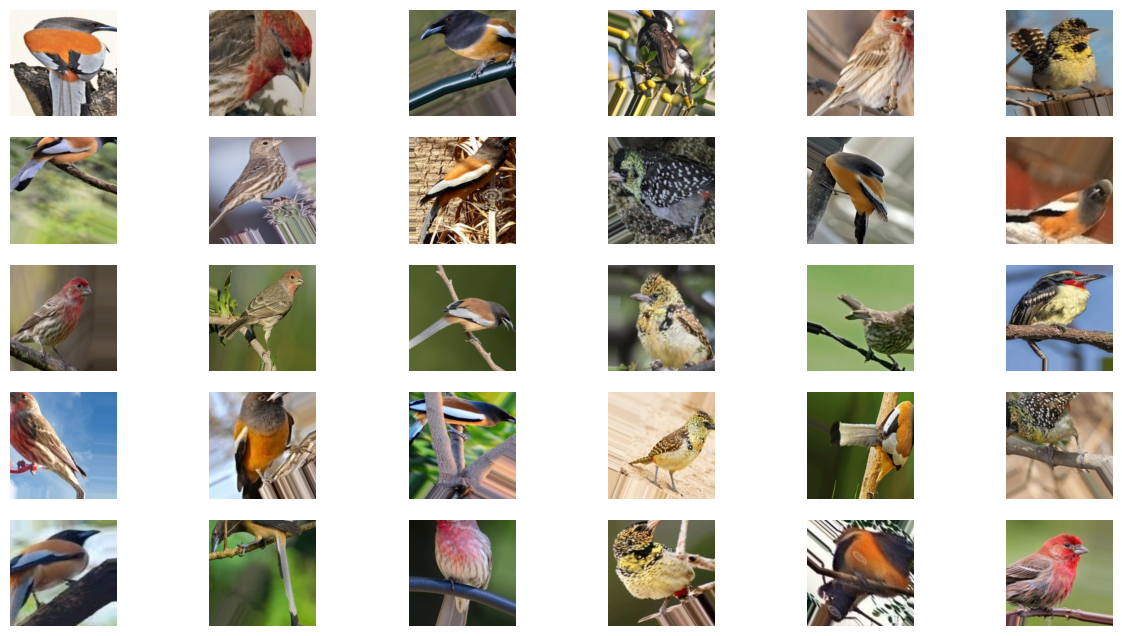

In [75]:
# We will display the augmented images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 6, figsize=(15, 8))
axes = axes.flatten()

for img, ax in zip(augmentedImages, axes):
    ax.imshow(img)
    ax.axis('off')

plt.show()

We will perform the 2nd set of augmentation

In [87]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

batchSize = 10
trainGenerator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical'
)

# We will get a batch of augmented images
augmentedImages, _ = trainGenerator.next()

Found 744 images belonging to 3 classes.


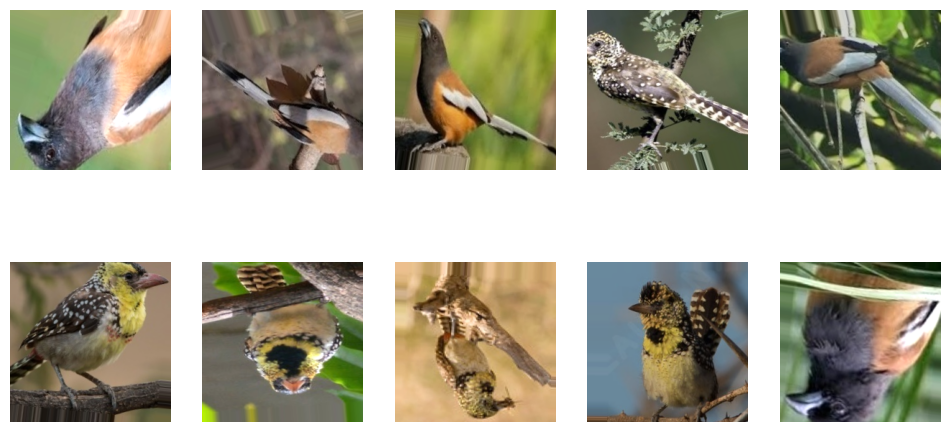

In [88]:
# Display the augmented images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for img, ax in zip(augmentedImages, axes):
    ax.imshow(img)
    ax.axis('off')

plt.show()

We will now perform the 3rd set of Augmentation

In [77]:
import numpy as np

In [89]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,
    featurewise_center=True, 
    featurewise_std_normalization=True
)

batchSize = 32
trainGenerator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical'
)


Found 744 images belonging to 3 classes.


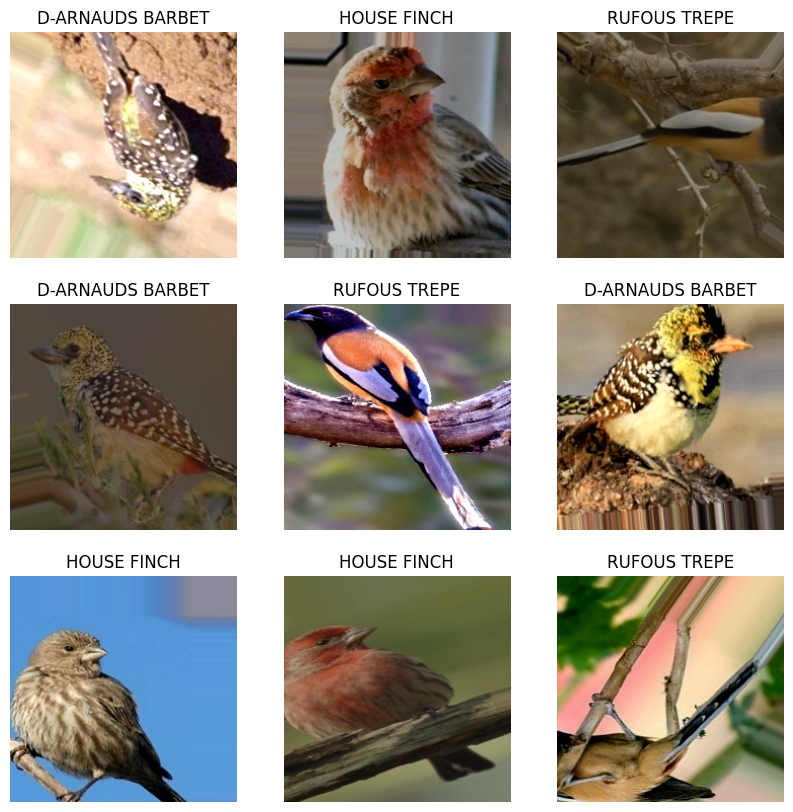

In [91]:
# We will display the batches of augmented images generated
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
    
    plt.show()

# We will generate augmented images and labels and convert the one-hot encoded labels to class names
augmentedImages, augmentedLabels = next(trainGenerator)
classLabels = list(trainGenerator.class_indices.keys())
augmentedClassNames = [classLabels[np.argmax(label)] for label in augmentedLabels]

# We will display the augmented images
plot_images(augmentedImages, augmentedClassNames)

We will now perform the 4th set of Augmentation

In [92]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,  
    featurewise_center=True,  
    featurewise_std_normalization=True,
    zca_whitening=True
)

# Flow from directory with data augmentation
batchSize = 32
trainGenerator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical'
)

Found 744 images belonging to 3 classes.


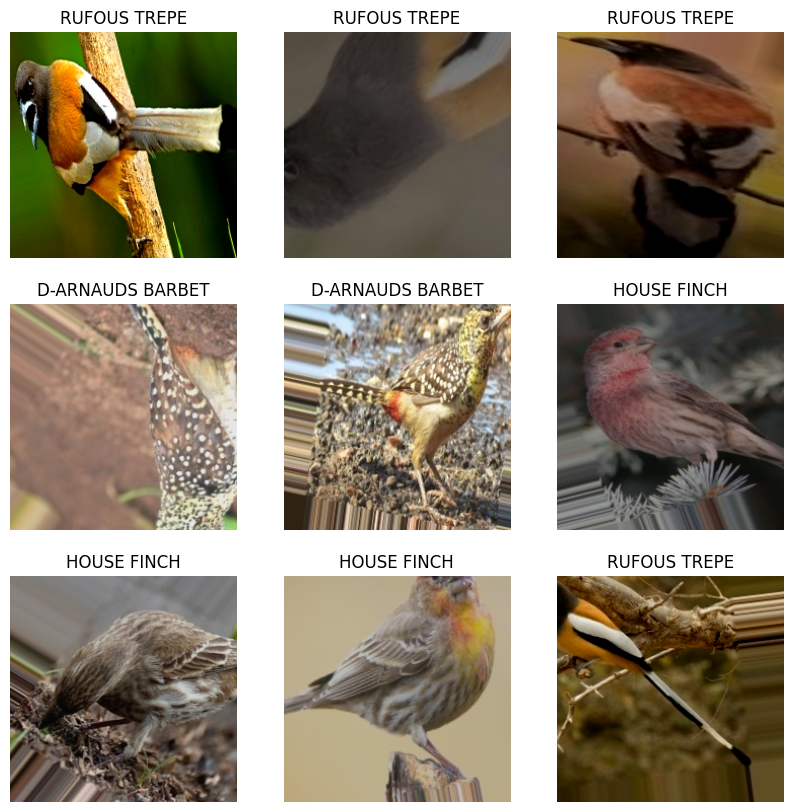

In [93]:
# We will display the batches of augmented images generated
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")
    plt.show()

# We will generate augmented images and labels and convert the one-hot encoded labels to class names
augmentedImages, augmentedLabels = next(trainGenerator)
classLabels = list(trainGenerator.class_indices.keys())
augmentedClassNames = [classLabels[np.argmax(label)] for label in augmentedLabels]

# We will display augmented images
plot_images(augmentedImages, augmentedClassNames)

# Part 3:
3. Fine-Tune VGG16 (pre-trained on imagenet), to classify the 3 classes (2 points)

In [94]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters for fine-tuning - 1st set
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# We will create a VGG16 model with pre-trained weights
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We will freeze the layers of the pre-trained model
for layer in baseModel.layers:
    layer.trainable = False

# Now, we will build a custom model for fine-tuning and compile the model
model = models.Sequential()
model.add(baseModel)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

58889256/58889256 [==============================] - 17s 0us/step


In [96]:
# Create data generators for training and validation using the augmented data
batch_size = 32
train_generator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# We will train the model and save it
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    verbose=1
)
model.save('FineTunedVGG16_set1.h5')

Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 58s 2s/step - loss: 1.0171 - accuracy: 0.6124
Epoch 2/10
23/23 [==============================] - 60s 3s/step - loss: 0.4184 - accuracy: 0.8230
Epoch 3/10
23/23 [==============================] - 60s 3s/step - loss: 0.3835 - accuracy: 0.8567
Epoch 4/10
23/23 [==============================] - 61s 3s/step - loss: 0.2925 - accuracy: 0.8975
Epoch 5/10
23/23 [==============================] - 61s 3s/step - loss: 0.2580 - accuracy: 0.9031
Epoch 6/10
23/23 [==============================] - 64s 3s/step - loss: 0.2338 - accuracy: 0.9101
Epoch 7/10
23/23 [==============================] - 64s 3s/step - loss: 0.1867 - accuracy: 0.9312
Epoch 8/10
23/23 [==============================] - 83s 4s/step - loss: 0.1923 - accuracy: 0.9185
Epoch 9/10
23/23 [==============================] - 105s 5s/step - loss: 0.1608 - accuracy: 0.9396
Epoch 10/10
23/23 [==============================] - 60s 3s/step - loss: 0.1

In [97]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters for fine-tuning - 2nd set
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# We will create a VGG16 model with pre-trained weights
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We will freeze the layers of the pre-trained model
for layer in baseModel.layers:
    layer.trainable = False

# Now, we will build a custom model for fine-tuning and compile the model
model = models.Sequential()
model.add(baseModel)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [98]:
# We will create data generators for training and validation using the augmented data
batch_size = 32
train_generator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# We will train the model and save it
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    verbose=1
)
model.save('FineTunedVGG16_set2.h5')

Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 65s 3s/step - loss: 1.1591 - accuracy: 0.6039
Epoch 2/10
23/23 [==============================] - 67s 3s/step - loss: 0.4309 - accuracy: 0.8371
Epoch 3/10
23/23 [==============================] - 66s 3s/step - loss: 0.3519 - accuracy: 0.8750
Epoch 4/10
23/23 [==============================] - 66s 3s/step - loss: 0.2605 - accuracy: 0.9045
Epoch 5/10
23/23 [==============================] - 67s 3s/step - loss: 0.2521 - accuracy: 0.9129
Epoch 6/10
23/23 [==============================] - 63s 3s/step - loss: 0.2278 - accuracy: 0.9340
Epoch 7/10
23/23 [==============================] - 63s 3s/step - loss: 0.1999 - accuracy: 0.9368
Epoch 8/10
23/23 [==============================] - 63s 3s/step - loss: 0.1581 - accuracy: 0.9494
Epoch 9/10
23/23 [==============================] - 63s 3s/step - loss: 0.1778 - accuracy: 0.9270
Epoch 10/10
23/23 [==============================] - 64s 3s/step - loss: 0.15

In [99]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters for fine-tuning - 3rd set
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,  
    featurewise_center=True,  
    featurewise_std_normalization=True
)

# We will create a VGG16 model with pre-trained weights
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We will freeze the layers of the pre-trained model
for layer in baseModel.layers:
    layer.trainable = False

# Now, we will build a custom model for fine-tuning and compile the model
model = models.Sequential()
model.add(baseModel)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [100]:
# We will create data generators for training and validation using the augmented data
batch_size = 32
train_generator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# We will train the model and save it
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    verbose=1
)
model.save('FineTunedVGG16_set3.h5')

Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 65s 3s/step - loss: 1.1845 - accuracy: 0.5421
Epoch 2/10
23/23 [==============================] - 62s 3s/step - loss: 0.6223 - accuracy: 0.7556
Epoch 3/10
23/23 [==============================] - 64s 3s/step - loss: 0.4747 - accuracy: 0.8090
Epoch 4/10
23/23 [==============================] - 63s 3s/step - loss: 0.4148 - accuracy: 0.8413
Epoch 5/10
23/23 [==============================] - 63s 3s/step - loss: 0.3853 - accuracy: 0.8525
Epoch 6/10
23/23 [==============================] - 63s 3s/step - loss: 0.3995 - accuracy: 0.8680
Epoch 7/10
23/23 [==============================] - 63s 3s/step - loss: 0.3038 - accuracy: 0.8876
Epoch 8/10
23/23 [==============================] - 66s 3s/step - loss: 0.3119 - accuracy: 0.8947
Epoch 9/10
23/23 [==============================] - 63s 3s/step - loss: 0.3117 - accuracy: 0.8876
Epoch 10/10
23/23 [==============================] - 63s 3s/step - loss: 0.25

In [102]:
# We will define the path to the directory with the top three classes
newDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'

# We will set up data augmentation parameters for fine-tuning - 4th set
imageDataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  
    brightness_range=[0.5, 1.5],
    channel_shift_range=50.0,  
    featurewise_center=True,  
    featurewise_std_normalization=True
)

# We will create a VGG16 model with pre-trained weights
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# We will freeze the layers of the pre-trained model
for layer in baseModel.layers:
    layer.trainable = False

# Now, we will build a custom model for fine-tuning and compile the model
model = models.Sequential()
model.add(baseModel)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [103]:
# We will create data generators for training and validation using the augmented data
batch_size = 32
train_generator = imageDataGen.flow_from_directory(
    newDataDirectory,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# We will train the model and save it
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    verbose=1
)
model.save('FineTunedVGG16_set4.h5')

Found 744 images belonging to 3 classes.
Epoch 1/10
23/23 [==============================] - 63s 3s/step - loss: 1.1213 - accuracy: 0.5463
Epoch 2/10
23/23 [==============================] - 63s 3s/step - loss: 0.6216 - accuracy: 0.7275
Epoch 3/10
23/23 [==============================] - 66s 3s/step - loss: 0.5135 - accuracy: 0.7767
Epoch 4/10
23/23 [==============================] - 65s 3s/step - loss: 0.4647 - accuracy: 0.8258
Epoch 5/10
23/23 [==============================] - 64s 3s/step - loss: 0.4241 - accuracy: 0.8343
Epoch 6/10
23/23 [==============================] - 64s 3s/step - loss: 0.3774 - accuracy: 0.8666
Epoch 7/10
23/23 [==============================] - 65s 3s/step - loss: 0.3741 - accuracy: 0.8427
Epoch 8/10
23/23 [==============================] - 65s 3s/step - loss: 0.3497 - accuracy: 0.8722
Epoch 9/10
23/23 [==============================] - 66s 3s/step - loss: 0.3072 - accuracy: 0.8806
Epoch 10/10
23/23 [==============================] - 114s 5s/step - loss: 0.2

# Part 4:
4. Explore the model performance: accuracy, confusion metric, precision, recall, F1-score, precision-recall curve and its area under the curve (AUC). Explore specific examples in which the model failed to predict correctly. (2 points)

In [107]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

In [118]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt

In [119]:
# We will load the saved model
model = models.load_model('FineTunedVGG16_set4.h5')

# We will set up data generator for the test data
testDataDirectory = 'C:/Users/nihal/CSCN8010 - Lab 2 Submission - Nihal Patel/CSCN8010-lab-submissions/students_submissions/8945100/Lab10/archive/Top Three Folders'
testDataGen = ImageDataGenerator(rescale=1./255)
testGenerator = testDataGen.flow_from_directory(
    testDataDirectory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# We will generate predictions for the test data
predictions = model.predict(testGenerator)
y_pred = np.argmax(predictions, axis=1)
y_true = testGenerator.classes

Found 744 images belonging to 3 classes.
24/24 [==============================] - 65s 3s/step


In [122]:
# We will compute accuracy
accuracy = np.mean(y_pred == y_true)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# We will compute confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# We will compute precision, recall, and F1-score for each class
classification_rep = classification_report(y_true, y_pred, target_names=testGenerator.class_indices.keys())
print("Classification Report:")
print(classification_rep)

Accuracy: 95.70%
Confusion Matrix:
[[227   1   5]
 [  7 227  14]
 [  4   1 258]]
Classification Report:
                  precision    recall  f1-score   support

D-ARNAUDS BARBET       0.95      0.97      0.96       233
     HOUSE FINCH       0.99      0.92      0.95       248
    RUFOUS TREPE       0.93      0.98      0.96       263

        accuracy                           0.96       744
       macro avg       0.96      0.96      0.96       744
    weighted avg       0.96      0.96      0.96       744



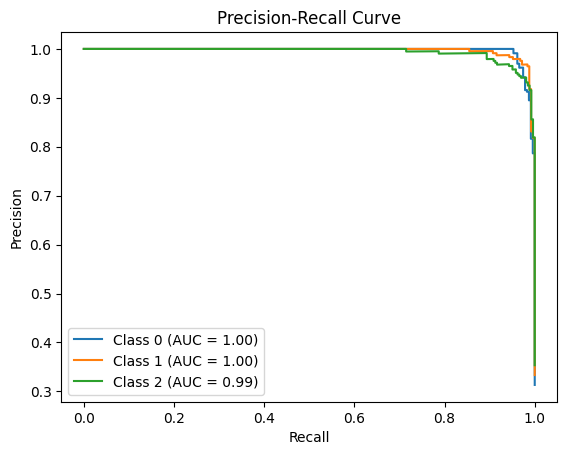

In [123]:
# We will compute precision-recall curve and AUC for each class
precision = dict()
recall = dict()
auc_score = dict()
for i in range(testGenerator.num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true == i, predictions[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# We will Plot precision-recall curve for each class
plt.figure()
for i in range(testGenerator.num_classes):
    plt.plot(recall[i], precision[i], label='Class {} (AUC = {:.2f})'.format(i, auc_score[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()